# Plotting

There are many libraries for plotting in Python. The standard library is [`matplotlib`](https://matplotlib.org/). Its [examples](https://matplotlib.org/examples/index.html) and [gallery](https://matplotlib.org/gallery.html) are particularly useful references.

Matplotlib is most useful if you have data in `numpy` arrays. We can then plot standard single graphs straightforwardly:

In [1]:
%matplotlib inline

The above command is only needed if you are plotting in a Jupyter notebook.

We now construct some data:

In [2]:
import numpy

x = numpy.linspace(0, 1)
y1 = numpy.sin(numpy.pi * x) + 0.1 * numpy.random.rand(50)
y2 = numpy.cos(3.0 * numpy.pi * x) + 0.2 * numpy.random.rand(50)

And then produce a line plot:

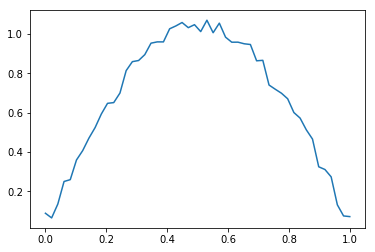

In [3]:
from matplotlib import pyplot
pyplot.plot(x, y1)
pyplot.show()

We can add labels and titles:

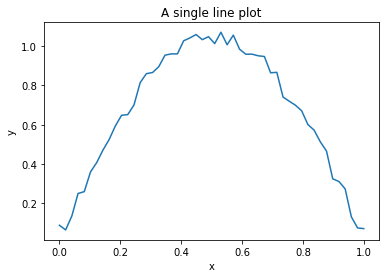

In [4]:
pyplot.plot(x, y1)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('A single line plot')
pyplot.show()

We can change the plotting style, and use LaTeX style notation where needed:

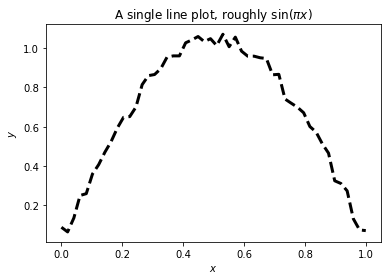

In [5]:
pyplot.plot(x, y1, linestyle='--', color='black', linewidth=3)
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title(r'A single line plot, roughly $\sin(\pi x)$')
pyplot.show()

We can plot two lines at once, and add a legend, which we can position:

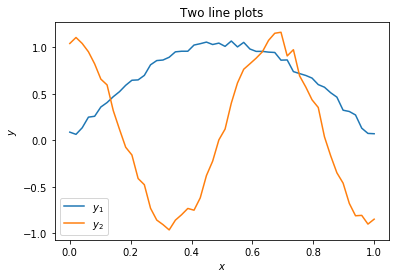

In [6]:
pyplot.plot(x, y1, label=r'$y_1$')
pyplot.plot(x, y2, label=r'$y_2$')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('Two line plots')
pyplot.legend(loc='lower left')
pyplot.show()

We would probably prefer to use subplots. At this point we have to leave the simple interface, and start building the plot using its individual components, `figures` and `axes`, which are objects to manipulate:

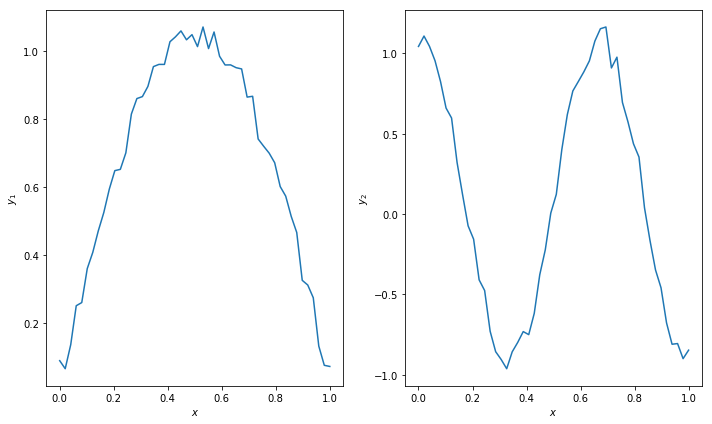

In [7]:
fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(10,6))
axis1 = axes[0]
axis1.plot(x, y1)
axis1.set_xlabel(r'$x$')
axis1.set_ylabel(r'$y_1$')
axis2 = axes[1]
axis2.plot(x, y2)
axis2.set_xlabel(r'$x$')
axis2.set_ylabel(r'$y_2$')
fig.tight_layout()
pyplot.show()

The `axes` variable contains all of the separate axes that you may want. This makes it easy to construct many subplots using a loop:

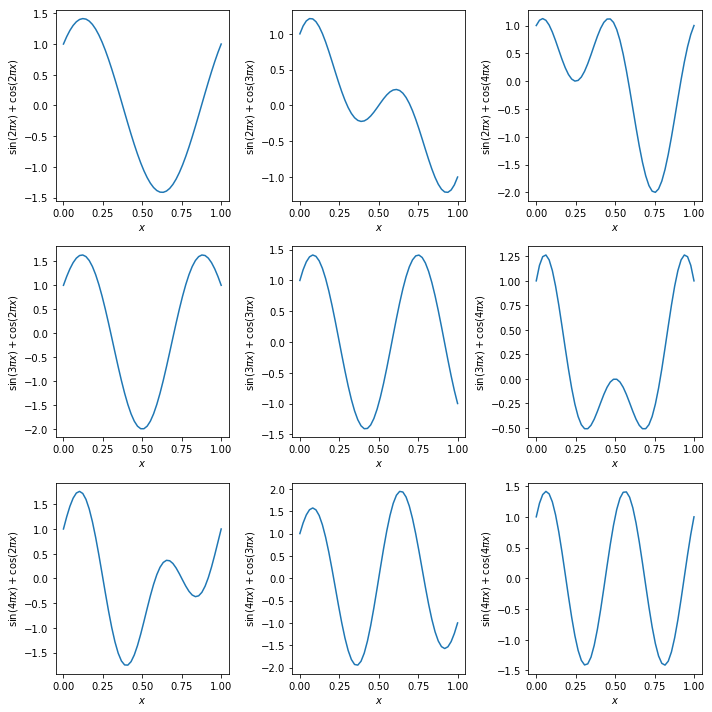

In [8]:
data = []
for nx in range(2,5):
    for ny in range(2,5):
        data.append(numpy.sin(nx * numpy.pi * x) + numpy.cos(ny * numpy.pi * x))

fig, axes = pyplot.subplots(nrows=3, ncols=3, figsize=(10,10))
for nrow in range(3):
    for ncol in range(3):
        ndata = ncol + 3 * nrow
        axes[nrow, ncol].plot(x, data[ndata])
        axes[nrow, ncol].set_xlabel(r'$x$')
        axes[nrow, ncol].set_ylabel(r'$\sin({} \pi x) + \cos({} \pi x)$'.format(nrow+2, ncol+2))
fig.tight_layout()
pyplot.show()

Matplotlib will allow you to generate and place axes pretty much wherever you like, to use logarithmic scales, to do different types of plot, and so on. Check the [examples](https://matplotlib.org/examples/index.html) and [gallery](https://matplotlib.org/gallery.html) for details.

# Data sets

If the information is not in `numpy` arrays but in a spreadsheet-like format, Matplotlib may not be the best approach.

For handling large data sets, the standard Python library is [`pandas`](http://pandas.pydata.org/). It keeps the data in a *dataframe* which keeps the rectangular data together with its labels.

Let's load the standard [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), which we can get [from GitHub](https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv), in:

In [9]:
import pandas

In [10]:
iris = pandas.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')

In [11]:
print(iris.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


Note that `pandas` can read Excel files (using `pandas.read_excel`), and takes as arguments either the URL (as here) or the filename on the local machine.

Once we have the data, `<dataframe>.plot` gives us lots of options to plot the result. Let's plot a histogram of the Petal Length:

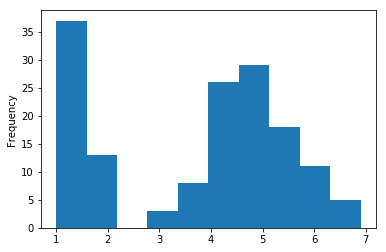

In [12]:
iris['PetalLength'].plot.hist()
pyplot.show()

We can see the underlying library is Matplotlib, but it's far easier to plot large data sets.

# Other libraries

There are many other options depending on what you need to display. If you have large data and want to more easily make nice plots, try [`seaborn`](http://seaborn.pydata.org/index.html) or [`altair`](https://altair-viz.github.io/). If you want to make the data interactive, especially online, try [`plotly`](https://plot.ly/) or [`bokeh`](http://bokeh.pydata.org/en/latest/).